# Student Performance Indicator 

## Life Cycle of a ML project

- Understanding the problem statement.
- Data collection.
- Data check to perform.
- Exploratory data analysis (EDA).
- Data pre-processing.
- Model training.
- Choosing the best model.

## 1. Problem Statement

This project involves predicting the relationship between a student's performance (test scores) and other variables such as: Gender, Ethnicity, Parantal Level of Education, Lunch and Test Preparation.

## 2. Data Collection

- Dataset Source: [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- The data contains 8 columns and 1000 rows.

### 2.1. Importing Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV data as Pandas DataFrame

In [3]:
df = pd.read_csv('./data/StudentsPerformance.csv')

Show Top 5 Records

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [5]:
df.shape

(1000, 8)

### 2.2. Dataset Information

- **Gender:** Sex of student (Male/Female).
- **Race/Ethnicity:** Ethnicity of student (Group A,B,C,D,E).
- **Parental level of education:** Parents' final education level (Bachelor's degree, Some college, Master's degree, Associate's degree, High school).
- **Lunch:** Having lunch before test (standard or free/reduced).
- **Test preparation course:** Complete or not complete before test.
- **Math score**.
- **Reading score**.
- **Writing score**.

## 3. Data Checks to Perform

- Check missing values.
- Check duplicates.
- Check data type.
- Check the number of unique values for each column.
- Check statistics of the data set.
- Check various categories present in the different categorical column.

### 3.1. Check missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset.

### 3.2 Check Duplicates

In [7]:
int(df.duplicated().sum())

0

There are no duplicates values in the dataset.

### 3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of the dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**

- From this description of numerical data, all means are very close to each other - between 66.08 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for *math*, for *writing*, the minimum is much higher (10), and for *reading*, it is even higher (17).

### 3.6 Check various categories present in the different categorical column.

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable:")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:")
print(df['test preparation course'].unique())

Categories in 'gender' variable:
['female' 'male']
Categories in 'race_ethnicity' variable:
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:
['standard' 'free/reduced']
Categories in 'test preparation course' variable:
['none' 'completed']


In [13]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.7 Add columns for the total score and the average score

In [14]:
df['total score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
df['average score'] = df['total score'] / 3
df['average score'] = df['average score'].round(2)

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [16]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_20 = df[df['reading score'] <= 20]['average score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average score'].count()
math_less_20 = df[df['math score'] <= 20]['average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights**

- Students have performed the worst in Maths.
- Best performance was in Reading.

## 4. Exploring the Data (Visualization)

### 4.1. Visualize average score distribution to gather insight.

- Histogram.
- Kernel Distribution Function (KDE).

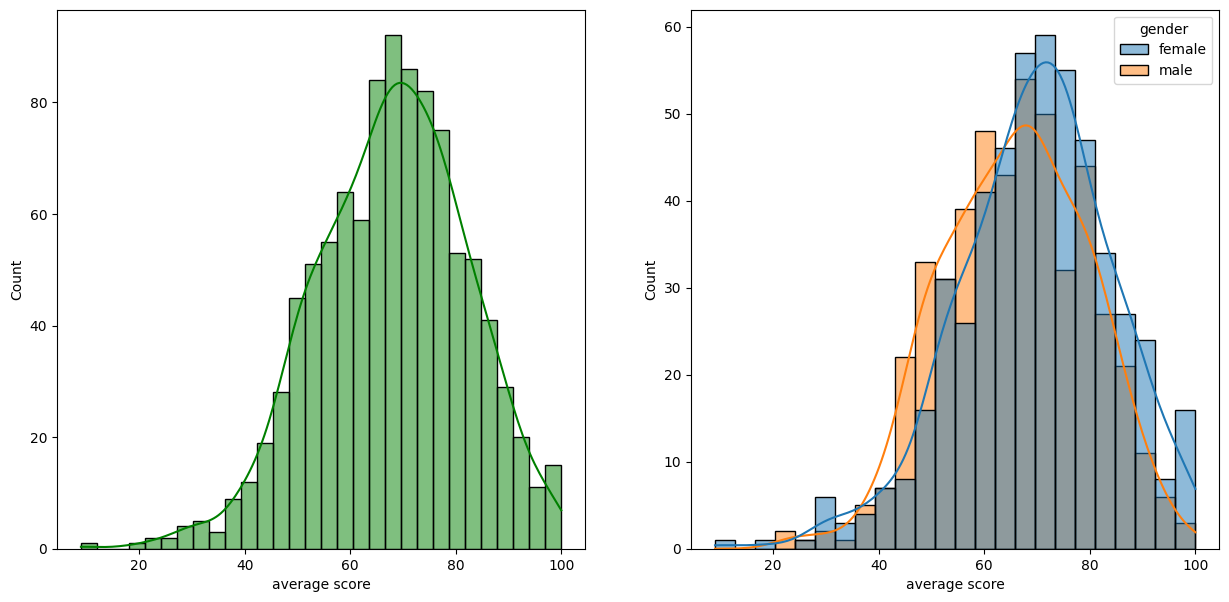

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

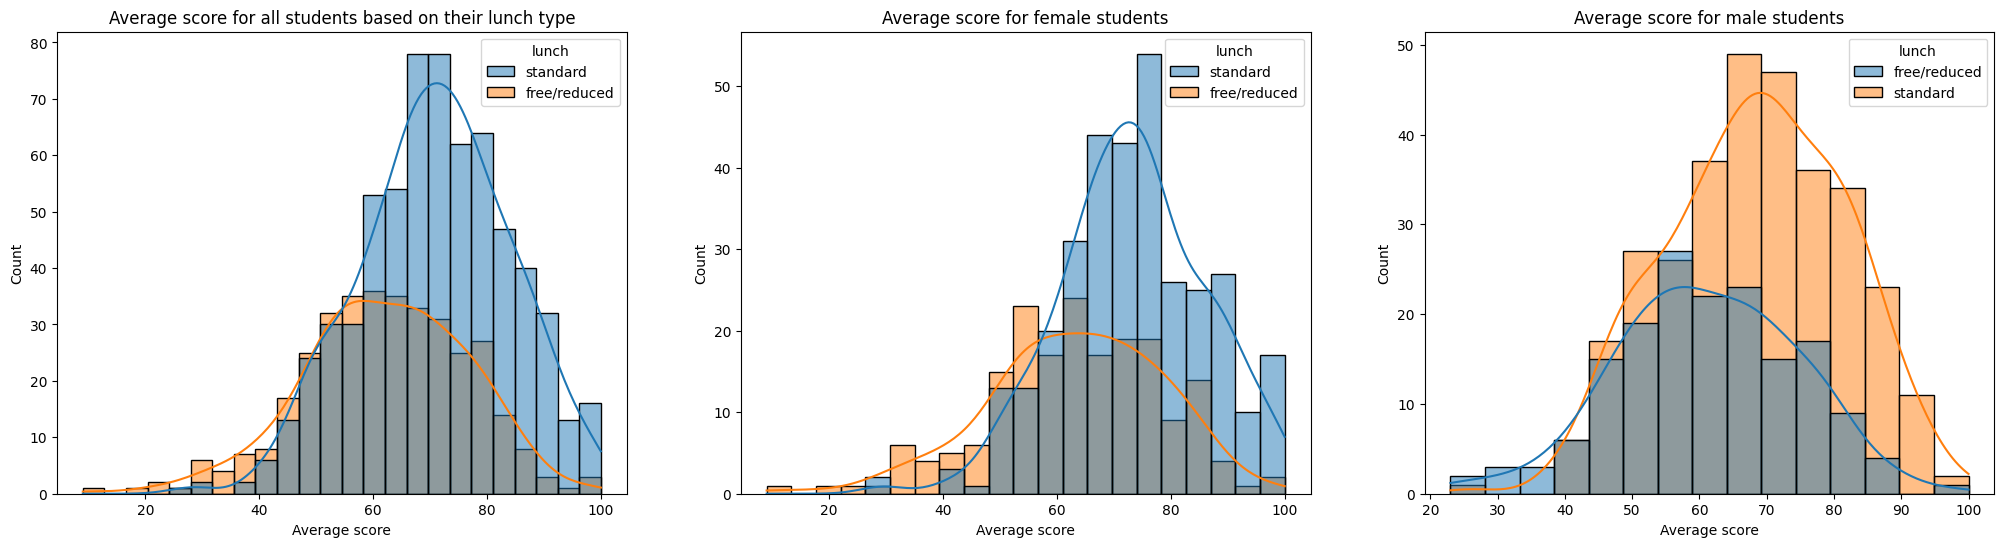

In [ ]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.title('Average score for all students based on their lunch type')
plt.xlabel('Average score')
plt.ylabel('Count')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch', color='pink')
plt.title('Average score for female students')
plt.xlabel('Average score')
plt.ylabel('Count')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.title('Average score for male students')
plt.xlabel('Average score')
plt.ylabel('Count')

plt.show()